In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

In [6]:
print(" ===== Dataset Info ===== ")
print(df.info())
print("\n ===== First 5 Rows ===== ")
print(df.head())
print("\n ===== Class Distribution ===== ")
print(df['species'].value_counts())

 ===== Dataset Info ===== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

 ===== First 5 Rows ===== 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.

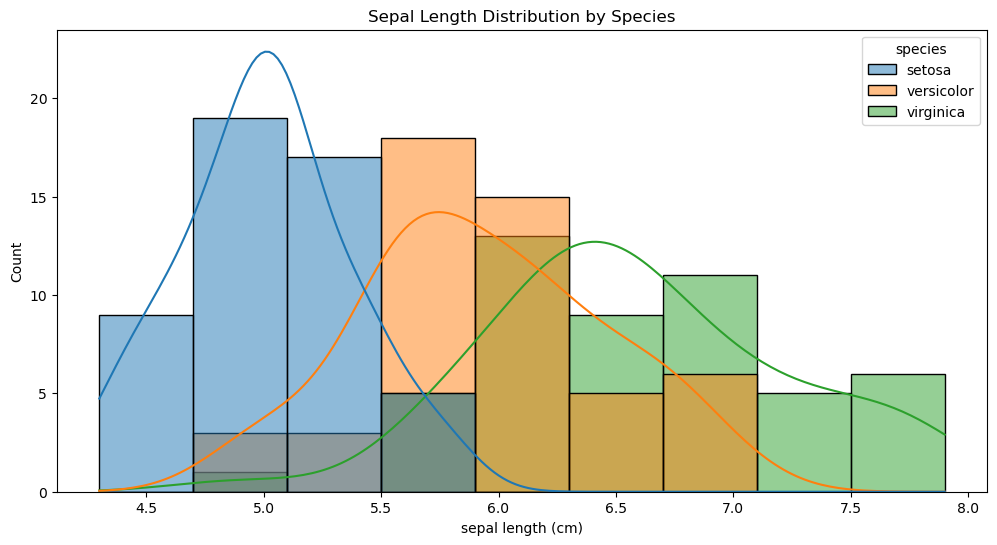

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df, x="sepal length (cm)", hue="species", kde=True)
plt.title("Sepal Length Distribution by Species")
plt.show()

<Figure size 1200x600 with 0 Axes>

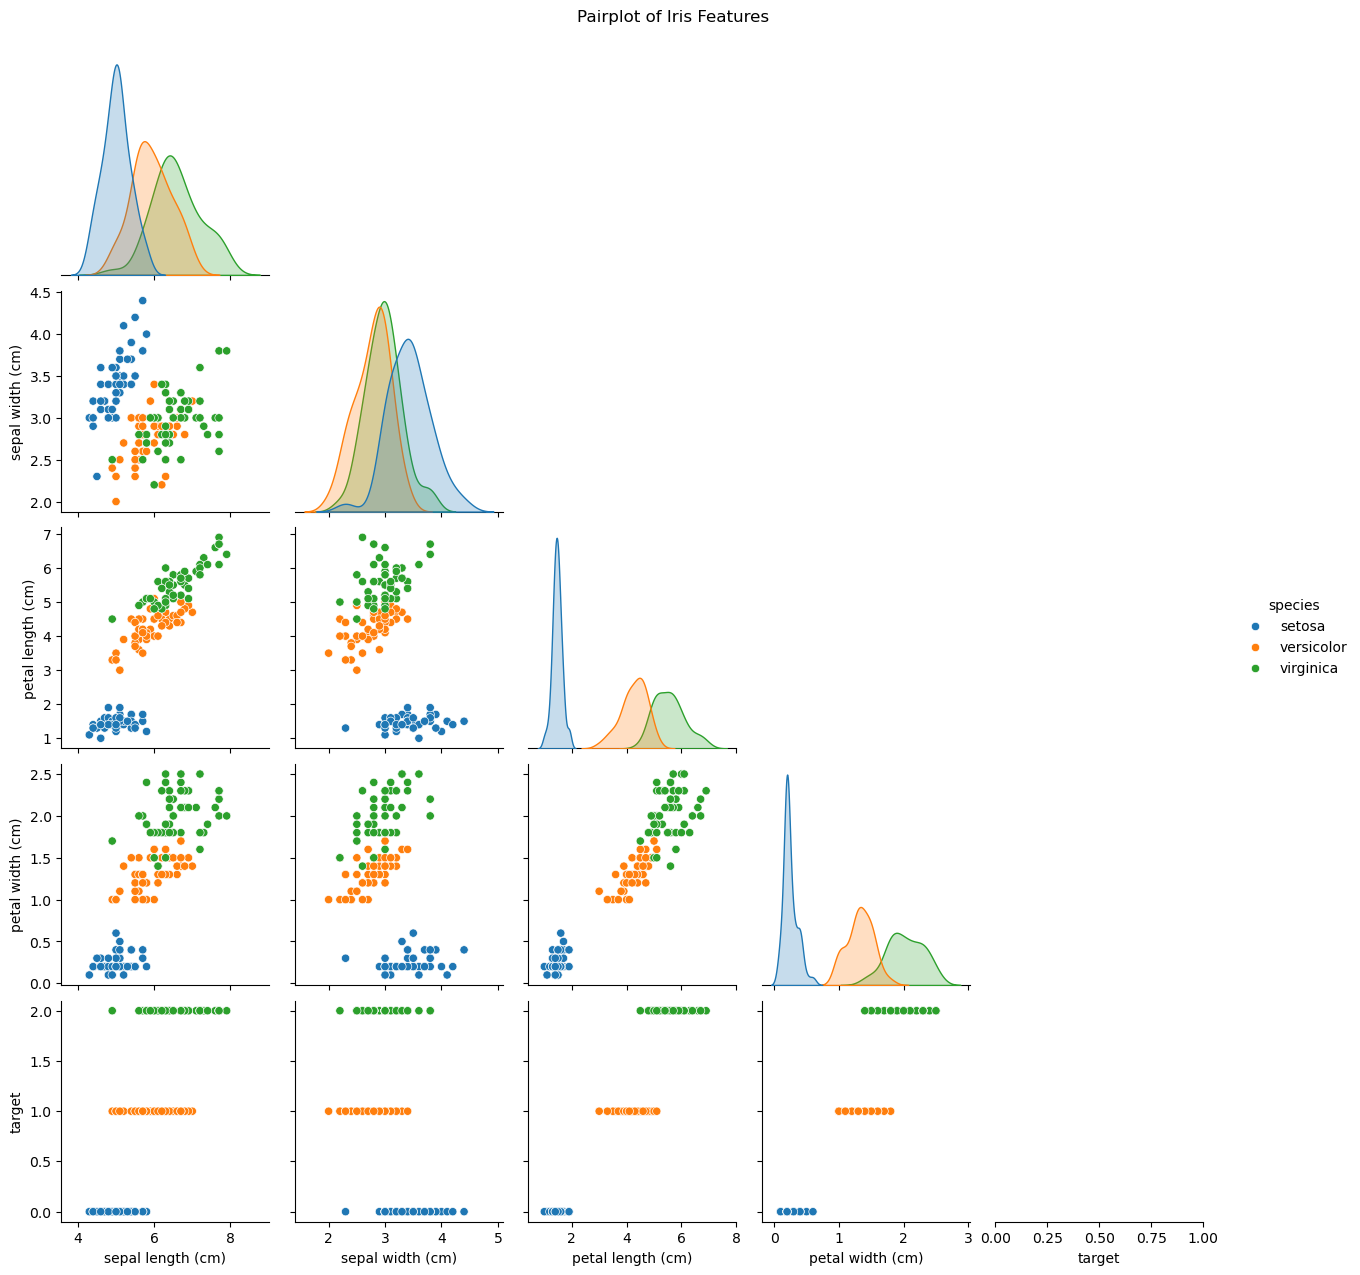

In [10]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue="species", corner=True)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

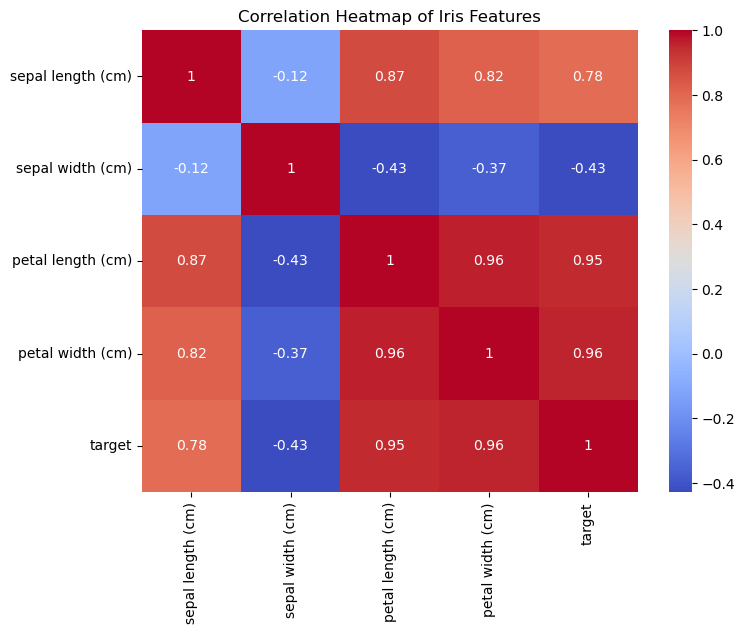

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Features")
plt.show()

In [12]:
X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("\n===== Model Evaluation =====")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


===== Model Evaluation =====
Accuracy: 0.978

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



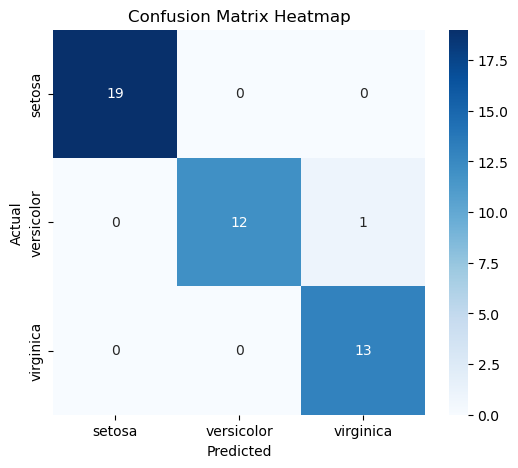

In [16]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [18]:
X_vis = df[['sepal length (cm)', 'sepal width (cm)']].values
y_vis = df['target'].values

In [19]:
model_vis = GaussianNB()
model_vis.fit(X_vis, y_vis)

GaussianNB()

In [21]:
x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [22]:
Z = model_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

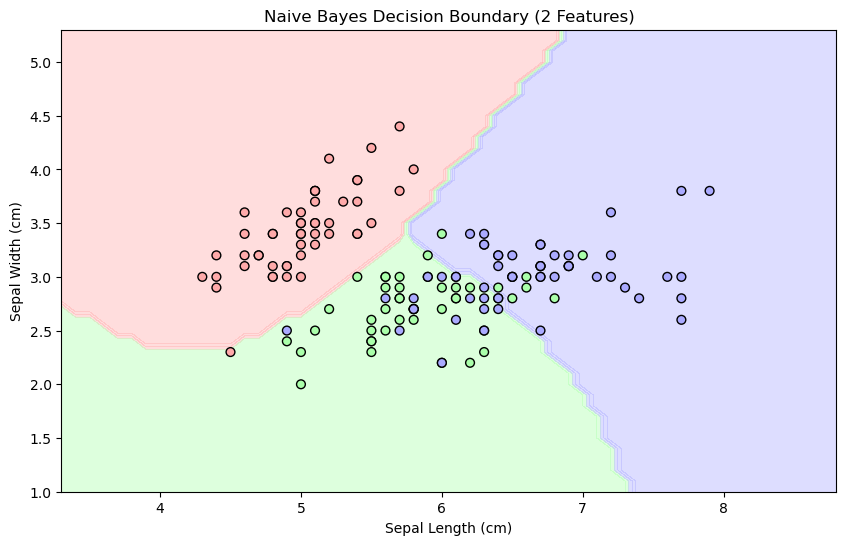

In [23]:
plt.figure(figsize=(10,6))
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, alpha=0.4, cmap=colors)
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, s=40, edgecolor='k', cmap=colors)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Naive Bayes Decision Boundary (2 Features)")
plt.show()